# COGS 108 - Final Project 

# Overview

The NFL season usually starts in September and ends in February. Across the 17-week regular season and the playoffs afterwards, weather conditions at a team’s home stadium could change substantially. Furthermore, teams not only play at their home stadiums, but also have to travel to other regions in the country, possibly with very different climate, to play away games. Therefore, it is expected that teams will play under different weather conditions throughout the season. Knowing the relationship between team performance and weather conditions will be useful to NFL teams so that they may adopt different strategies under different weather conditions and hold special training sessions before playing at their least favorite weather conditions.  


# Names

- Annie Wai
- Chen Xu
- Christopher Yeh
- Ronak Sheth
- Shun Fujinami
- Yupei Zhou

# Group Members IDs

- A12944645
- A13636618
- A15720503
- A92086612
- A14255552
- A13410536

# Research Question

Our question is how does weather, with an emphasis on temperature, wind speed, and humidity affect the outcome of a National Football League (NFL) game. We will be analyzing the weather data during each NFL game, and finding a correlation between how well each team performs within given weather parameters.

## Background and Prior Work


There has been previous studies on how weather affects NFL games, even as far as betting lines being affected by the weather. According to Sports Betting Stats line-makers (bookies that determine the odds and payouts for betting on games) factor in temperature, precipitation, and wind speed when creating the betting odds. There has also been studies published by individuals based on data science which include “dome teams” (teams with an indoor stadium at home) playing in extreme weather, or the drop off of production by a quarterback in poor weather. Advanced Football Analytics analyzed data for when teams played in away stadiums and compared their home climate to the away climate. Most notably was “dome teams” not winning a single away game when the temperature was 20 degrees or lower. In another article Towards Data Science studied each quarterback’s statistics when playing in extreme weather. This article demonstrated a clear drop off in production of each quarterback when comparing their play in “great weather” versus “bad weather” Each of these previous studies narrowed down the data to specific scenarios, or a specific player’s position when analyzing the data. Our study will broaden the scope of how weather affects NFL games to every team, and every game in our dataset. This study will demonstrate how big a factor weather plays in determining the outcome of an NFL game in the grand scheme of all factors that play a part in winning an NFL game. 

References (include links): 
- 1) Sports Bettings Stats (https://www.sportsbettingstats.com/nfl/football-weather)
- 2) Advanced Football Analytics (http://archive.advancedfootballanalytics.com/2012/01/how-does-temperature-affect-road-teams.html)
- 3) Towards Data Science (https://towardsdatascience.com/football-weather-diving-into-the-effects-of-weather-on-nfl-qb-performance-f0edb420623d)

# Hypothesis


Our hypothesis to the question is that each team will have a preferred weather range in which they perform their best, and that weather range will be most similar to the average weather at their home stadium. 

# Dataset(s)


- Dataset Name: NFL scores and betting data
- Link to the dataset: https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data#spreadspoke_scores.csv
- Number of observations: 12400

This dataset includes 12,400 games since the 1966 season with 17 variables including: 
schedule date, schedule season, schedule week, schedule playoff, team home, score home, score away, team away, team favorite id, spread favorite, over under line, stadium, stadium neutral, weather temperature, weather wind mph, weather humidity, and extra weather detail.


# Setup


In [14]:
from scipy.stats import ttest_ind, chisquare, normaltest, ttest_1samp

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning


We created a dataframe from the dataset csv file. We will drop the following unused columns: schedule season, schedule week, schedule playoff, stadium neutral, team favorite id, spread favorite, and over under line. We will also drop any games played indoors.

In [16]:
df = pd.read_csv("./nfl-scores-and-betting-data/spreadspoke_scores.csv")
df = df.drop(columns=["schedule_season", "schedule_week", "schedule_playoff", "stadium_neutral", 
                      "team_favorite_id", "spread_favorite", "over_under_line"],
             axis=1)
df = df[df.weather_detail != "DOME"]

Based on the score of the home and away team, we want to add a column to indicate the outcome of the game.

In [17]:
for index, row in df.iterrows():
    score_home = df.loc[index]['score_home']
    score_away = df.loc[index]['score_away']
    if score_home > score_away:
        df.at[index, 'home_w_l_t'] = 'WIN'
    elif score_away > score_home:
         df.at[index, 'home_w_l_t'] = 'LOSS'
    else:
        df.at[index, 'home_w_l_t'] = 'TIE'

It would appear that most entries are missing weather humidity and weather detail, so we are dropping rows without weather humidity and the whole column of weather detail.

In [18]:
df.dropna(subset=['weather_humidity'], inplace = True)
df = df.drop(columns = ['weather_detail'])
df.head()

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_w_l_t
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,LOSS
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,WIN
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,WIN
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,LOSS
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,WIN


Here we'll gather the temperature and wind speed data separately.

In [22]:
temp_win = []
temp_tie = []
temp_loss = []
wind_win = []
wind_tie = []
wind_loss = []

for index, row in df.iterrows():
    if row["home_w_l_t"] == "WIN":
        temp_win.append(row["weather_temperature"])
        wind_win.append(row["weather_wind_mph"])
    elif row["home_w_l_t"] == "TIE":
        temp_tie.append(row["weather_temperature"])
        wind_tie.append(row["weather_wind_mph"])
    else:
        temp_loss.append(row["weather_temperature"])
        wind_loss.append(row["weather_wind_mph"])

# Data Analysis & Results

(array([  13.,   35.,  109.,  336.,  699.,  967., 1143.,  973.,  503.,
          84.]),
 array([-5. ,  4.7, 14.4, 24.1, 33.8, 43.5, 53.2, 62.9, 72.6, 82.3, 92. ]),
 <a list of 10 Patch objects>)

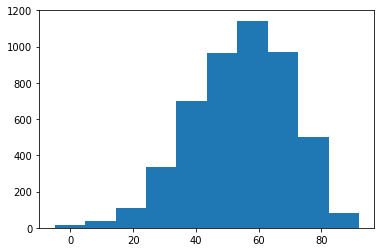

In [7]:
# here I will graph the histogram for the temperatures
# temp_win histogram
plt.hist(df[df["home_w_l_t"] == "WIN"]["weather_temperature"])

(array([ 2.,  4., 10.,  7.,  7., 17., 12.,  6.,  3.,  2.]),
 array([20. , 26.2, 32.4, 38.6, 44.8, 51. , 57.2, 63.4, 69.6, 75.8, 82. ]),
 <a list of 10 Patch objects>)

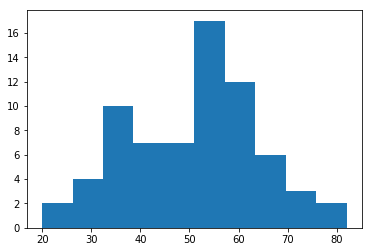

In [8]:
# temp_tie histogram
plt.hist(df[df["home_w_l_t"] == "TIE"]["weather_temperature"])

(array([  7.,  24., 101., 287., 559., 758., 817., 581., 288.,  34.]),
 array([-2. ,  7.7, 17.4, 27.1, 36.8, 46.5, 56.2, 65.9, 75.6, 85.3, 95. ]),
 <a list of 10 Patch objects>)

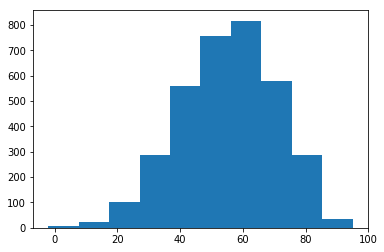

In [9]:
# temp_loss histogram
plt.hist(df[df["home_w_l_t"] == "LOSS"]["weather_temperature"])

(array([ 143.,  722., 1438., 1283.,  681.,  371.,  144.,   56.,   22.,
           2.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

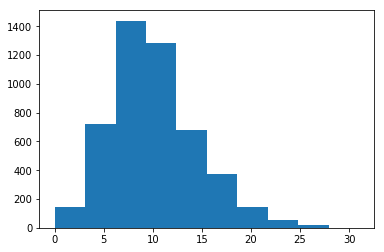

In [10]:
# histograms for wind_speeds
# wind_win histogram
plt.hist(df[df["home_w_l_t"] == "WIN"]["weather_wind_mph"])

(array([ 9.,  8., 19., 15., 10.,  4.,  3.,  0.,  1.,  1.]),
 array([ 4. ,  6.1,  8.2, 10.3, 12.4, 14.5, 16.6, 18.7, 20.8, 22.9, 25. ]),
 <a list of 10 Patch objects>)

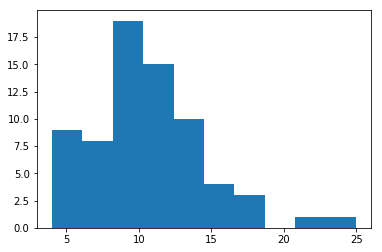

In [11]:
# wind_tie histogram
plt.hist(df[df["home_w_l_t"] == "TIE"]["weather_wind_mph"])

(array([ 128.,  522., 1033.,  896.,  498.,  263.,   81.,   22.,    8.,
           5.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

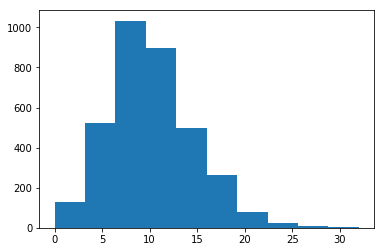

In [12]:
# wind_loss histogram
plt.hist(df[df["home_w_l_t"] == "LOSS"]["weather_wind_mph"])

In [13]:
# A t-test to check if there is any statistically significant difference between temp_win and temp_loss.
t_val_weather, p_val_weather = ttest_ind(temp_win, temp_loss)

In [14]:
# Indeed there is a statistically significant difference, as the p-value is very small.
t_val_weather, p_val_weather

(-2.741049044299961, 0.006137419103358492)

In [15]:
# A t-test to check if there is any statistically significant difference between wind_win and wind_loss.
t_val_wind, p_val_wind = ttest_ind(wind_win, wind_loss)

In [16]:
# The t-test does not yield a small p-value, so we cannot conclude that there is a statistically significant difference.
t_val_wind, p_val_wind

(1.4349573206864878, 0.15133686599379564)

In [17]:
# Make a copy of df
df1 = df.copy()

In [18]:
# We compute the average temperature of all the games won by each team.
# The averages are saved as a new column 'avg_temperature'
df1['avg_temperature'] = df1.groupby(['team_home', 'home_w_l_t'])['weather_temperature'].transform(np.mean)

In [19]:
# Then we compute the standard deviation of temperature of all the games won by each team.
# The standard deviations are saved as a new column 'std_temperature'
df1['std_temperature'] = df1.groupby(['team_home', 'home_w_l_t'])['weather_temperature'].transform(np.std)

In [20]:
# With average and standard deviation of each group already computed, we can proceed to compute the z-score.
# The z-scores are saved as a new column 'z_score_temperature'
df1['z_score_temperature'] = (df1['weather_temperature'] - df1['avg_temperature']) / df1['std_temperature']

In [21]:
df1.head()

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_w_l_t,avg_temperature,std_temperature,z_score_temperature
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,NaN,LOSS,76.254386,6.995335,0.964302
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,NaN,WIN,79.000000,2.828427,0.707107
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,NaN,WIN,63.828877,7.095555,0.869717
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,NaN,LOSS,76.254386,6.995335,0.821349
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,NaN,WIN,42.695652,16.134627,1.320412


We want to see if there are any correlation with the outcome of the game based on the difference of temperature from their average home temperature.

In [22]:
df1['diff_temperature'] = df1['avg_temperature'] - df1['weather_temperature']
df1.head()

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_w_l_t,avg_temperature,std_temperature,z_score_temperature,diff_temperature
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,NaN,LOSS,76.254386,6.995335,0.964302,-6.745614
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,NaN,WIN,79.000000,2.828427,0.707107,-2.000000
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,NaN,WIN,63.828877,7.095555,0.869717,-6.171123
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,NaN,LOSS,76.254386,6.995335,0.821349,-5.745614
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,NaN,WIN,42.695652,16.134627,1.320412,-21.304348


Text(0, 0.5, 'Density')

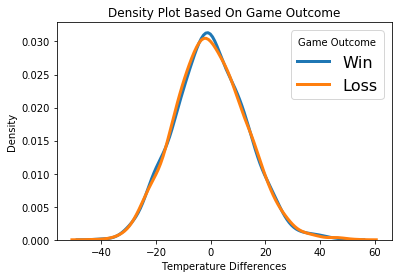

In [23]:
loss_temp = df1.loc[df1['home_w_l_t'] == 'LOSS']
win_temp = df1.loc[df1['home_w_l_t'] == 'WIN']
#tie_temp = df1.loc[df1['home_w_l_t'] == 'TIE'] #TODO possibly take this out



sns.distplot(loss_temp['diff_temperature'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Win')
sns.distplot(win_temp['diff_temperature'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Loss')
#sns.distplot(tie_temp['diff_temperature'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Tie')

plt.legend(prop={'size': 16}, title = 'Game Outcome')
plt.title('Density Plot Based On Game Outcome')
plt.xlabel('Temperature Differences')
plt.ylabel('Density')

# Ethics and Privacy

We do not have any privacy issues regarding this data as it was built from publicly available data published by the NFL, as well as publicly available weather data from NOAA. The ramifications of the results of this study could span to the population who places bets on the outcomes of NFL games, and this study could be used to predict unlikely outcomes. It is also important to consider the privacy and reputation of the sports teams analyzed, as negative attention to a team’s performance or brand may negatively affect their public opinion.

# Conclusion & Discussion

*Fill in your discussion information here*